# Training Model - Unbalance Data

# Import Library

In [1]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Read Data

In [2]:
#Read data X_train dan y_rus hasil dari data preparation
X_rus_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_rus_clean.pkl") 
y_rus = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_rus.pkl")

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_valid_clean.pkl")
y_valid = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_valid.pkl")

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_test_clean.pkl")
y_test = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_test.pkl")

## Baseline Model

In [3]:
y_rus.value_counts(normalize = True)
# baseline akurasi = 80%
# Before Smote Sampling

0    0.5
1    0.5
Name: Exited, dtype: float64

In [4]:
y_baseline_predict = y_rus.mean()
y_baseline_predict

0.5

## Logistic Regression

In [5]:
# Build Logistic Regression
logreg_awal = LogisticRegression(random_state = 123)

In [6]:
# fit Logistic Regression
logreg_awal.fit(X_rus_clean, y_rus)

LogisticRegression(random_state=123)

In [7]:
# Melihat Score dari model logreg
logreg_awal.score(X_rus_clean, y_rus)

0.7091480446927374

In [8]:
#Prediksi Logreg
logreg_pred = logreg_awal.predict(X_test_clean)

In [9]:
#Melihat Classification report
print(classification_report(y_test, logreg_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1424
           1       0.37      0.78      0.51       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.63      1800
weighted avg       0.81      0.68      0.71      1800



In [10]:
#Melihat score data train, validation dan test
print("Train_Score = ", logreg_awal.score(X_rus_clean, y_rus), 
      "Valid_Score = ",logreg_awal.score(X_valid_clean, y_valid),
      "Test_Score = ", logreg_awal.score(X_test_clean, y_test))

Train_Score =  0.7091480446927374 Valid_Score =  0.665 Test_Score =  0.68


## Tuning Parameter Logistic Regression

In [11]:
# Membentuk parameter untuk eksperimentasi
lr_param_grid = {
    'C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty' : ['l1', 'l2', 'elasticnet','none']
}

In [12]:
# Cross Validation menggunakan GridsearchCV
lr_grid = GridSearchCV(LogisticRegression(random_state = 123), lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [13]:
#Fitting Model lr grid
lr_grid.fit(X_rus_clean, y_rus)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.710 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.658 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.733 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1,

[CV 2/5] END ...C=0.05, penalty=l1, solver=saga;, score=0.681 total time=   0.0s
[CV 3/5] END ...C=0.05, penalty=l1, solver=saga;, score=0.729 total time=   0.0s
[CV 4/5] END ...C=0.05, penalty=l1, solver=saga;, score=0.714 total time=   0.0s
[CV 5/5] END ...C=0.05, penalty=l1, solver=saga;, score=0.720 total time=   0.0s
[CV 1/5] END C=0.05, penalty=l2, solver=liblinear;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.05, penalty=l2, solver=liblinear;, score=0.670 total time=   0.0s
[CV 3/5] END C=0.05, penalty=l2, solver=liblinear;, score=0.735 total time=   0.0s
[CV 4/5] END C=0.05, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 5/5] END C=0.05, penalty=l2, solver=liblinear;, score=0.717 total time=   0.0s
[CV 1/5] END C=0.05, penalty=l2, solver=newton-cg;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.05, penalty=l2, solver=newton-cg;, score=0.677 total time=   0.0s
[CV 3/5] END C=0.05, penalty=l2, solver=newton-cg;, score=0.740 total time=   0.0s
[CV 4/5] END

[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.717 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.740 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.715 total time=   0.0s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.740 total time=   0.0s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.715 total time=   0.0s
[CV 1/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.696 total time=   0.0s
[CV 2/5] END .....C=0.

[CV 4/5] END C=0.5, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.5, penalty=l2, solver=newton-cg;, score=0.705 total time=   0.0s
[CV 1/5] END ...C=0.5, penalty=l2, solver=lbfgs;, score=0.695 total time=   0.0s
[CV 2/5] END ...C=0.5, penalty=l2, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 3/5] END ...C=0.5, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 4/5] END ...C=0.5, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 5/5] END ...C=0.5, penalty=l2, solver=lbfgs;, score=0.705 total time=   0.0s
[CV 1/5] END .....C=0.5, penalty=l2, solver=sag;, score=0.695 total time=   0.0s
[CV 2/5] END .....C=0.5, penalty=l2, solver=sag;, score=0.672 total time=   0.0s
[CV 3/5] END .....C=0.5, penalty=l2, solver=sag;, score=0.738 total time=   0.0s
[CV 4/5] END .....C=0.5, penalty=l2, solver=sag;, score=0.719 total time=   0.0s
[CV 5/5] END .....C=0.5, penalty=l2, solver=sag;, score=0.705 total time=   0.0s
[CV 1/5] END ....C=0.5, pe

[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.670 total time=   0.0s
[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s
[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.721 total time=   0.0s
[CV 5/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.705 total time=   0.0s
[CV 1/5] END .......C=1, penalty=l2, solver=sag;, score=0.695 total time=   0.0s
[CV 2/5] END .......C=1, penalty=l2, solver=sag;, score=0.670 total time=   0.0s
[CV 3/5] END .......C=1, penalty=l2, solver=sag;, score=0.736 total time=   0.0s
[CV 4/5] END .......C=1, penalty=l2, solver=sag;, score=0.721 total time=   0.0s
[CV 5/5] END .......C=1, penalty=l2, solver=sag;, score=0.705 total time=   0.0s
[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.695 total time=   0.0s
[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.670 total time=   0.0s
[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.736 total time=   0.0s
[CV 4/5] END ......C=1, pena

[CV 2/5] END .......C=5, penalty=l2, solver=sag;, score=0.670 total time=   0.0s
[CV 3/5] END .......C=5, penalty=l2, solver=sag;, score=0.736 total time=   0.0s
[CV 4/5] END .......C=5, penalty=l2, solver=sag;, score=0.721 total time=   0.0s
[CV 5/5] END .......C=5, penalty=l2, solver=sag;, score=0.705 total time=   0.0s
[CV 1/5] END ......C=5, penalty=l2, solver=saga;, score=0.696 total time=   0.0s
[CV 2/5] END ......C=5, penalty=l2, solver=saga;, score=0.670 total time=   0.0s
[CV 3/5] END ......C=5, penalty=l2, solver=saga;, score=0.736 total time=   0.0s
[CV 4/5] END ......C=5, penalty=l2, solver=saga;, score=0.721 total time=   0.0s
[CV 5/5] END ......C=5, penalty=l2, solver=saga;, score=0.705 total time=   0.0s
[CV 1/5] END C=5, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=5, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=5, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [14]:
#Melihat parameter terbaik untuk model
print(lr_grid.best_params_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [15]:
#Input parameter terbaik hasil GridsearchCV
lr_grid_cv  = LogisticRegression(C = lr_grid.best_params_["C"],
                                 penalty = lr_grid.best_params_["penalty"],
                                 solver = lr_grid.best_params_["solver"])

#Kembali fitting model
lr_grid_cv.fit(X_rus_clean, y_rus)

LogisticRegression(C=0.01, solver='liblinear')

In [16]:
print(f"Training Data Score: {lr_grid_cv.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {lr_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lr_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.714036312849162
Validating Data Score: 0.6775
Testing Data Score: 0.6816666666666666


In [17]:
#Prediksi dengan menggunakan data test
logregtun_pred = lr_grid_cv.predict(X_test_clean)

In [18]:
#Melihat Classification report
print(classification_report(y_test, logregtun_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1424
           1       0.37      0.78      0.50       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.64      1800
weighted avg       0.80      0.68      0.71      1800



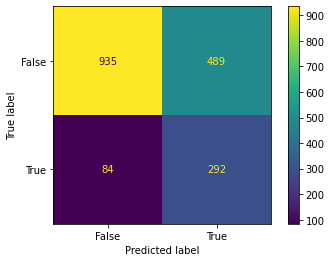

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, logregtun_pred, display_labels = [False, True])
plt.show()

## Support Vector Classifier

In [20]:
svc_ori = SVC(random_state = 123)

In [21]:
# fit Support Vector Classifier
svc_ori.fit(X_rus_clean, y_rus)

SVC(random_state=123)

In [22]:
#Cek Score model SVC
svc_ori.score(X_rus_clean, y_rus)

0.799231843575419

In [23]:
svc_predict = svc_ori.predict(X_test_clean)

In [24]:
print(classification_report(y_test, svc_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1424
           1       0.44      0.80      0.57       376

    accuracy                           0.75      1800
   macro avg       0.69      0.77      0.70      1800
weighted avg       0.83      0.75      0.77      1800



In [25]:
print(f"Training Data Score: {svc_ori.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {svc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.799231843575419
Validating Data Score: 0.7358333333333333
Testing Data Score: 0.7488888888888889


## Tuning Parameter SVC

In [26]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'gamma': ['scale', 'auto']
             }

In [27]:
#Membentuk parameter untuk eksperimentasi
svc_grid = GridSearchCV(SVC(random_state = 123), 
                        param_grid, 
                        verbose=3, 
                        cv= 5, 
                        n_jobs=4, 
                        scoring='accuracy')

In [28]:
#Melakukan fitting model gridsearchcv
svc_grid.fit(X_rus_clean, y_rus)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=4,
             param_grid={'C': [0.0005, 0.001, 0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [29]:
#Melihat parameter terbaik
svc_grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}

In [30]:
#Melakukan input parameter terbaik hasil gridsearch
svc_grid_cv  = SVC(kernel = svc_grid.best_params_["kernel"],
                   gamma = svc_grid.best_params_["gamma"],
                   C = svc_grid.best_params_["C"]
                  )

In [31]:
svc_grid_cv.fit(X_rus_clean, y_rus)

SVC(C=0.5)

In [32]:
print(f"Training Data Score: {svc_grid_cv.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {svc_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.7821229050279329
Validating Data Score: 0.7158333333333333
Testing Data Score: 0.7311111111111112


In [33]:
svc_pred_cv = svc_grid_cv.predict(X_test_clean)

In [34]:
print(classification_report(y_test, svc_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1424
           1       0.42      0.81      0.56       376

    accuracy                           0.73      1800
   macro avg       0.68      0.76      0.68      1800
weighted avg       0.83      0.73      0.75      1800



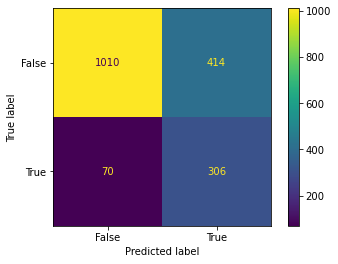

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred_cv, display_labels = [False, True])
plt.show()

## Decisiontree

In [36]:
# Model Decision Tree
decTree = DecisionTreeClassifier(random_state = 123)

In [37]:
# Fitting model
decTree.fit(X_rus_clean, y_rus)

DecisionTreeClassifier(random_state=123)

In [38]:
# Model score
decTree.score(X_rus_clean, y_rus)

1.0

In [39]:
#Prediksi data menggunakan data test
dectree_predict = decTree.predict(X_test_clean)

In [40]:
#Melihat Classification report
print(classification_report(y_test, dectree_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1424
           1       0.38      0.75      0.51       376

    accuracy                           0.69      1800
   macro avg       0.65      0.71      0.64      1800
weighted avg       0.80      0.69      0.72      1800



In [41]:
#Melihat score prediksi dari data train, valid dan test
print(f"Training Data Score: {decTree.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {decTree.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.69
Testing Data Score: 0.6927777777777778


## Tuning Parameter Decisiontree

In [42]:
# Buat parameter untuk eksperimen
decTree_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                "criterion": ["gini", "entropy", "log_loss"],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],}

In [43]:
# Buat plan eksperimentasi
random_decTree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123),
                              param_grid = decTree_param,
                              cv = 5,
                              scoring = "accuracy") 

In [44]:
# Lakukan fitting eksperimentasi
random_decTree.fit(X_rus_clean, y_rus)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
random_decTree.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [46]:
# Buat model
best_decTree = DecisionTreeClassifier(max_depth = random_decTree.best_params_["max_depth"],
                                      criterion = random_decTree.best_params_["criterion"],
                                      min_samples_leaf = random_decTree.best_params_["min_samples_leaf"],
                                      min_samples_split = random_decTree.best_params_["min_samples_split"],
                                      random_state = 123)

In [47]:
# Fit model
best_decTree.fit(X_rus_clean, y_rus)

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=123)

In [48]:
# Cek Train data
best_decTree.score(X_rus_clean, y_rus)

0.791550279329609

In [49]:
y_predict_dectree = best_decTree.predict(X_test_clean)

In [50]:
print(classification_report(y_test, y_predict_dectree))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1424
           1       0.47      0.77      0.58       376

    accuracy                           0.77      1800
   macro avg       0.70      0.77      0.71      1800
weighted avg       0.83      0.77      0.79      1800



In [51]:
print(f"Training Data Score: {best_decTree.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {best_decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {best_decTree.score(X_test_clean, y_test)}")

Training Data Score: 0.791550279329609
Validating Data Score: 0.7566666666666667
Testing Data Score: 0.7716666666666666


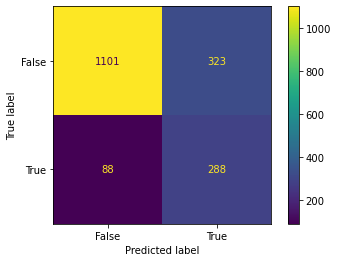

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_dectree, display_labels = [False, True])
plt.show()

## Randomforest Classifier

In [53]:
# Build random forest
random_forest = RandomForestClassifier(n_estimators = 100, 
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6, 
                                       min_samples_leaf=8,
                                       random_state = 123)

In [54]:
random_forest.fit(X_rus_clean, y_rus)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [55]:
random_forest.fit(X_rus_clean, y_rus)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [56]:
# Model score
random_forest.score(X_rus_clean, y_rus)

0.8002793296089385

In [57]:
y_pred_rf = random_forest.predict(X_test_clean)

In [58]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1424
           1       0.45      0.81      0.58       376

    accuracy                           0.76      1800
   macro avg       0.70      0.78      0.70      1800
weighted avg       0.84      0.76      0.78      1800



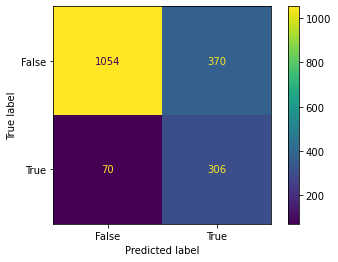

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels = [False, True])
plt.show()

## Tuning Parameter Randomforest

In [60]:
# Buat parameter untuk eksperimen
random_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'n_estimators': [50, 100, 200],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                "criterion": ["gini", "entropy"]
                }

In [61]:
# Buat plan eksperimentasi
random_forestcls = GridSearchCV(estimator = RandomForestClassifier(random_state=123),
                                param_grid = random_param,
                                cv = 5,
                                scoring = "accuracy") 

In [62]:
# Lakukan fitting eksperimentasi
random_forestcls.fit(X_rus_clean, y_rus)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [63]:
random_forestcls.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [64]:
# Buat model
random_forestcls_cv = RandomForestClassifier(max_depth = random_forestcls.best_params_["max_depth"],
                                             criterion = random_forestcls.best_params_["criterion"],
                                             n_estimators = random_forestcls.best_params_["n_estimators"],
                                             min_samples_leaf = random_forestcls.best_params_["min_samples_leaf"],
                                             min_samples_split = random_forestcls.best_params_["min_samples_split"],
                                             random_state = 123)

In [65]:
# Fit model
random_forestcls_cv.fit(X_rus_clean, y_rus)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=10, random_state=123)

In [66]:
predict_randomcls_cv = random_forestcls_cv.predict(X_test_clean)

In [67]:
print(classification_report(y_test, predict_randomcls_cv))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1424
           1       0.45      0.81      0.58       376

    accuracy                           0.76      1800
   macro avg       0.70      0.78      0.71      1800
weighted avg       0.84      0.76      0.78      1800



In [68]:
print(f"Training Data Score: {random_forestcls_cv.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {random_forestcls_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {random_forestcls_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.9008379888268156
Validating Data Score: 0.76
Testing Data Score: 0.7561111111111111


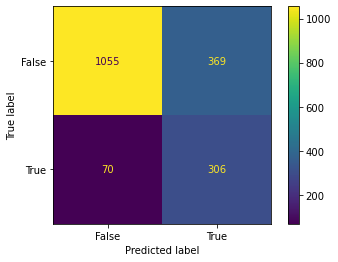

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_randomcls_cv, display_labels = [False, True])
plt.show()

## Ridge Classifier

In [70]:
ridge = RidgeClassifier(random_state = 123) #create a ridge classifier object

In [71]:
ridge.fit(X_rus_clean, y_rus) #train the model

RidgeClassifier(random_state=123)

In [72]:
ridge.score(X_rus_clean, y_rus)

0.7077513966480447

In [73]:
pred_ridge = ridge.predict(X_test_clean)

In [74]:
print(classification_report(y_test, pred_ridge, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1424
           1       0.38      0.78      0.51       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.64      1800
weighted avg       0.81      0.68      0.71      1800



In [75]:
print(f"Training Data Score: {ridge.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {ridge.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge.score(X_test_clean, y_test)}")

Training Data Score: 0.7077513966480447
Validating Data Score: 0.6691666666666667
Testing Data Score: 0.6827777777777778


## Tuning Parameter Ridge Classifier

In [76]:
clf_ridge = RidgeClassifier(random_state = 123)

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

ridge_cv = GridSearchCV(estimator=clf_ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [77]:
ridge_cv.fit(X_rus_clean, y_rus)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=RidgeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='accuracy')

In [78]:
ridge_cv.best_params_

{'alpha': 0.7}

In [79]:
# Buat model
ridge_cv = RidgeClassifier(alpha = ridge_cv.best_params_["alpha"],
                           random_state = 123)

In [80]:
# Fit model
ridge_cv.fit(X_rus_clean, y_rus)

RidgeClassifier(alpha=0.7, random_state=123)

In [81]:
# Cek Test data
ridge_cv.score(X_rus_clean, y_rus)

0.7077513966480447

In [82]:
predict_ridgecv = ridge_cv.predict(X_test_clean)

In [83]:
print(classification_report(y_test, predict_ridgecv))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1424
           1       0.38      0.78      0.51       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.64      1800
weighted avg       0.81      0.68      0.71      1800



In [84]:
print(f"Training Data Score: {ridge_cv.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {ridge_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.7077513966480447
Validating Data Score: 0.6691666666666667
Testing Data Score: 0.6827777777777778


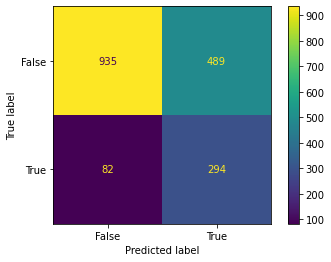

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_ridgecv, display_labels = [False, True])
plt.show()

## KNeighborsClassifier

In [86]:
# Build KNeighborsRegressor
knn_awal = KNeighborsClassifier()

In [87]:
# fit KNeighborsRegressor
knn_awal.fit(X_rus_clean, y_rus)

KNeighborsClassifier()

In [88]:
knn_awal.score(X_rus_clean, y_rus)

0.8093575418994413

In [89]:
knn_pred = knn_awal.predict(X_test_clean)

In [90]:
print(classification_report(y_test, knn_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1424
           1       0.40      0.74      0.52       376

    accuracy                           0.71      1800
   macro avg       0.66      0.72      0.66      1800
weighted avg       0.80      0.71      0.74      1800



In [91]:
print(f"Training Data Score: {knn_awal.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {knn_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {knn_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.8093575418994413
Validating Data Score: 0.7
Testing Data Score: 0.7127777777777777


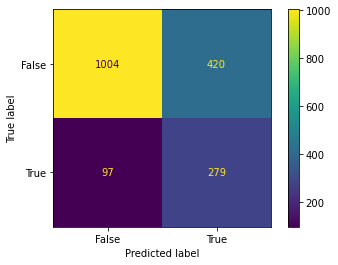

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, display_labels = [False, True])
plt.show()

## Tuning Parameter KNeighborsClassifier

In [93]:
kn_param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [94]:
knn = KNeighborsClassifier()

In [95]:
kn_grid = GridSearchCV(knn, kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [96]:
kn_grid.fit(X_rus_clean, y_rus)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.696 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.665 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.709 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.688 total time=   0.2s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.696 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.665 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.709 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.688 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.712 total time=   0.0s
[

[CV 5/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.736 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.707 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.674 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.754 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.745 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.745 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.688 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.759 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.743 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=dis

[CV 3/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.771 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.745 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.736 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.740 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.702 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.745 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.729 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=19, weights=distance;, score=0.735 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=19, weights=distance;, score=0.696 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=19, weights=di

[CV 1/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.723 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.698 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.750 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.749 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.740 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.721 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.749 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.743 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.736 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=28, weights=di

[CV 2/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.695 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.735 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.731 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.714 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.714 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.752 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.733 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.743 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.710 total time=   0.0s
[CV 2/5] END al

[CV 5/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.741 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.721 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.745 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.752 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.693 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.759 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.0s
[CV 5

[CV 5/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.740 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.742 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.698 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.745 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.754 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.724 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=23, weights=distance;, score=0.735 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=23, weights=distance;, score=0.691 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=23, weights=distance;, score=0.752 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=23, weights=distance;, score=0.761 total time=   0.0s
[CV 5

[CV 4/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.688 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.696 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.665 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.709 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.688 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.712 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.677 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.670 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_n

[CV 3/5] END algorithm=kd_tree, n_neighbors=10, weights=uniform;, score=0.754 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=10, weights=uniform;, score=0.745 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=10, weights=uniform;, score=0.745 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.688 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.759 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.743 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.755 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=11, weights=uniform;, score=0.721 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=11, weights=uniform;, score=0.698 total time=   0.0s
[CV 3/5] END algorithm=kd

[CV 5/5] END algorithm=kd_tree, n_neighbors=18, weights=distance;, score=0.736 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.740 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.702 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.745 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.729 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=19, weights=distance;, score=0.735 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=19, weights=distance;, score=0.696 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=19, weights=distance;, score=0.750 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=19, weights=distance;, score=0.742 total time=   0.0s
[CV 5/5] END algorithm=kd

[CV 3/5] END algorithm=kd_tree, n_neighbors=27, weights=distance;, score=0.750 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=27, weights=distance;, score=0.749 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=27, weights=distance;, score=0.740 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=28, weights=uniform;, score=0.721 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=28, weights=uniform;, score=0.696 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=28, weights=uniform;, score=0.749 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=28, weights=uniform;, score=0.743 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=28, weights=uniform;, score=0.736 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=28, weights=distance;, score=0.728 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=28, weights=distance;, score=0.698 total time=   0.0s
[CV 3/5] END algorithm=kd

[CV 5/5] END algorithm=brute, n_neighbors=6, weights=uniform;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=6, weights=distance;, score=0.714 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=6, weights=distance;, score=0.714 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=6, weights=distance;, score=0.752 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=6, weights=distance;, score=0.733 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=6, weights=distance;, score=0.743 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=7, weights=uniform;, score=0.710 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=7, weights=uniform;, score=0.702 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=7, weights=uniform;, score=0.766 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=7, weights=uniform;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=7, weights=un

[CV 3/5] END algorithm=brute, n_neighbors=15, weights=uniform;, score=0.759 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=15, weights=uniform;, score=0.736 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=15, weights=distance;, score=0.728 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=15, weights=distance;, score=0.696 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=15, weights=distance;, score=0.759 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=15, weights=distance;, score=0.736 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=15, weights=distance;, score=0.748 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.728 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.698 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=16,

[CV 1/5] END algorithm=brute, n_neighbors=24, weights=uniform;, score=0.728 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=24, weights=uniform;, score=0.693 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=24, weights=uniform;, score=0.736 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=24, weights=uniform;, score=0.756 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=24, weights=uniform;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=24, weights=distance;, score=0.740 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=24, weights=distance;, score=0.695 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=24, weights=distance;, score=0.747 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=24, weights=distance;, score=0.754 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=24, weights=distance;, score=0.736 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=25,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [97]:
print(kn_grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 22, 'weights': 'distance'}


In [98]:
# Refit the KNeighborsRegressor
kn_grid = KNeighborsClassifier(n_neighbors = kn_grid.best_params_["n_neighbors"],
                               weights = kn_grid.best_params_["weights"],
                               algorithm = kn_grid.best_params_["algorithm"]
                              )

In [99]:
kn_grid.fit(X_rus_clean, y_rus)

KNeighborsClassifier(n_neighbors=22, weights='distance')

In [100]:
knn_cvpred = kn_grid.predict(X_test_clean)

In [101]:
print(classification_report(y_test, knn_cvpred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1424
           1       0.41      0.77      0.53       376

    accuracy                           0.72      1800
   macro avg       0.66      0.74      0.66      1800
weighted avg       0.81      0.72      0.74      1800



In [102]:
print(f"Training Data Score: {kn_grid.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {kn_grid.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {kn_grid.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.7216666666666667
Testing Data Score: 0.7177777777777777


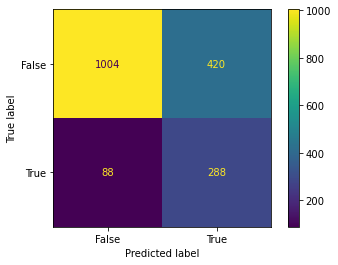

In [103]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_cvpred, display_labels = [False, True])
plt.show()

### Bagging Classifier

In [104]:
dec_tree = DecisionTreeClassifier(random_state=123)

In [105]:
bagging_cls = BaggingClassifier(base_estimator=dec_tree, n_estimators=10, random_state=123)

In [106]:
# fit KNeighborsRegressor
bagging_cls.fit(X_rus_clean, y_rus)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123),
                  random_state=123)

In [107]:
bagging_cls.score(X_rus_clean, y_rus)

0.9884776536312849

In [108]:
bagging_predict = bagging_cls.predict(X_test_clean)

In [109]:
print(classification_report(y_test, bagging_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1424
           1       0.45      0.76      0.56       376

    accuracy                           0.75      1800
   macro avg       0.68      0.75      0.70      1800
weighted avg       0.82      0.75      0.77      1800



In [110]:
print(f"Training Data Score: {bagging_cls.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {bagging_cls.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cls.score(X_test_clean, y_test)}")

Training Data Score: 0.9884776536312849
Validating Data Score: 0.7575
Testing Data Score: 0.7544444444444445


## Tuning Parameter Bagging Classifier

In [111]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
bagging_param_grid = {'n_estimators' : [10, 100, 1000]}

In [112]:
bagging_grid_cv = GridSearchCV(estimator=BaggingClassifier(random_state=123), 
                               param_grid=bagging_param_grid, 
                               n_jobs=-1, 
                               cv=cv, 
                               scoring='accuracy',
                               error_score=0)

In [113]:
bagging_grid_cv.fit(X_rus_clean, y_rus)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=123),
             error_score=0, estimator=BaggingClassifier(random_state=123),
             n_jobs=-1, param_grid={'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [114]:
bagging_grid_cv.best_params_

{'n_estimators': 1000}

In [115]:
bagging_cv  = BaggingClassifier(n_estimators = bagging_grid_cv.best_params_["n_estimators"])

In [116]:
bagging_cv.fit(X_rus_clean, y_rus)

BaggingClassifier(n_estimators=1000)

In [117]:
baggingcv_predict = bagging_cv.predict(X_test_clean)

In [118]:
print(classification_report(y_test, baggingcv_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1424
           1       0.44      0.79      0.57       376

    accuracy                           0.75      1800
   macro avg       0.69      0.76      0.69      1800
weighted avg       0.83      0.75      0.77      1800



In [119]:
print(f"Training Data Score: {bagging_cv.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {bagging_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cv.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.7591666666666667
Testing Data Score: 0.7466666666666667


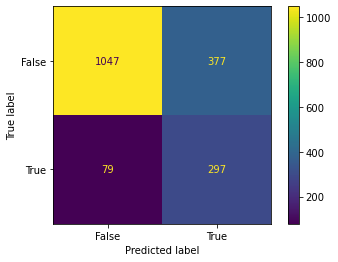

In [120]:
ConfusionMatrixDisplay.from_predictions(y_test, baggingcv_predict, display_labels = [False, True])
plt.show()

## Gradient Boosting

In [121]:
# Build GradientBoosting
grad_boost = GradientBoostingClassifier(random_state = 123)

In [122]:
# Fit GradientBoosting
grad_boost.fit(X_rus_clean, y_rus)

GradientBoostingClassifier(random_state=123)

In [123]:
grad_boost.score(X_rus_clean, y_rus)

0.8240223463687151

In [124]:
gradboost_predict = grad_boost.predict(X_test_clean)

In [125]:
print(classification_report(y_test, gradboost_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1424
           1       0.46      0.83      0.59       376

    accuracy                           0.76      1800
   macro avg       0.70      0.79      0.71      1800
weighted avg       0.84      0.76      0.78      1800



In [126]:
print(f"Training Data Score: {grad_boost.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {grad_boost.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {grad_boost.score(X_test_clean, y_test)}")

Training Data Score: 0.8240223463687151
Validating Data Score: 0.7591666666666667
Testing Data Score: 0.7611111111111111


### Tuning Parameter Gradient Boosting

In [127]:
grad_param_grid = {
    'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9]
}

In [128]:
grad_grid_cv = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=grad_param_grid,
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)

In [129]:
grad_grid_cv.fit(X_rus_clean, y_rus)

GridSearchCV(cv=5, error_score=0, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 7, 9], 'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [130]:
grad_grid_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}

In [131]:
gradboost_cv  = GradientBoostingClassifier(n_estimators = grad_grid_cv.best_params_["n_estimators"],
                                           learning_rate = grad_grid_cv.best_params_["learning_rate"],
                                           subsample = grad_grid_cv.best_params_["subsample"],
                                           max_depth = grad_grid_cv.best_params_["max_depth"],
                                           random_state = 123)

In [132]:
gradboost_cv.fit(X_rus_clean, y_rus)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, random_state=123,
                           subsample=0.7)

In [133]:
gradboost_pred_cv = gradboost_cv.predict(X_test_clean)

In [134]:
print(classification_report(y_test, gradboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1424
           1       0.47      0.80      0.59       376

    accuracy                           0.77      1800
   macro avg       0.70      0.78      0.71      1800
weighted avg       0.84      0.77      0.79      1800



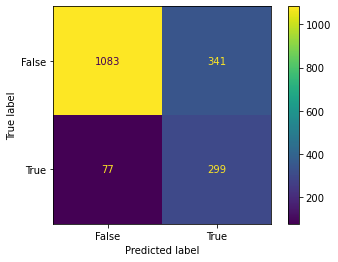

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test, gradboost_pred_cv, display_labels = [False, True])
plt.show()

## Adaboost Classifier

### Adaboost SVC

In [136]:
svc = SVC(probability=True, kernel='linear', random_state = 123)

# Create adaboost classifer object
adaboost_svc = AdaBoostClassifier(n_estimators=50, 
                                  base_estimator=svc,
                                  learning_rate=1)

In [137]:
# Train Adaboost Classifer
adaboost_svc.fit(X_rus_clean, y_rus)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                      random_state=123),
                   learning_rate=1)

In [138]:
adaboost_svc.score(X_rus_clean, y_rus)

0.5666899441340782

In [139]:
ada_predict = adaboost_svc.predict(X_test_clean)

In [140]:
print(classification_report(y_test, ada_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68      1424
           1       0.27      0.58      0.36       376

    accuracy                           0.58      1800
   macro avg       0.55      0.58      0.52      1800
weighted avg       0.72      0.58      0.62      1800



In [141]:
print(f"Training Data Score: {adaboost_svc.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {adaboost_svc.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_svc.score(X_test_clean, y_test)}")

Training Data Score: 0.5666899441340782
Validating Data Score: 0.5683333333333334
Testing Data Score: 0.5766666666666667


### Adaboost Original

In [142]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state = 123)

In [143]:
# Train Adaboost Classifer
abc_ori = abc.fit(X_rus_clean, y_rus)

In [144]:
abc_ori.score(X_rus_clean, y_rus)

0.7814245810055865

In [145]:
adaboost_pred_ori = abc_ori.predict(X_test_clean)

In [146]:
print(classification_report(y_test, adaboost_pred_ori, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1424
           1       0.46      0.82      0.59       376

    accuracy                           0.76      1800
   macro avg       0.70      0.78      0.71      1800
weighted avg       0.84      0.76      0.78      1800



In [147]:
print(f"Training Data Score: {abc_ori.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {abc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {abc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.7814245810055865
Validating Data Score: 0.7491666666666666
Testing Data Score: 0.7577777777777778


## Tuning Parameter Adaboost

In [148]:
adaboost = AdaBoostClassifier(random_state = 123)

In [149]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [150]:
grid_search_adaboost = GridSearchCV(adaboost, param_grid, scoring='accuracy', cv=5)

In [151]:
grid_search_adaboost.fit(X_rus_clean, y_rus)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [152]:
print(grid_search_adaboost.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}


In [153]:
adaboost_best = AdaBoostClassifier(n_estimators = grid_search_adaboost.best_params_["n_estimators"],
                                   learning_rate = grid_search_adaboost.best_params_["learning_rate"],
                                   algorithm = grid_search_adaboost.best_params_["algorithm"]
                                  )

In [154]:
adaboost_best.fit(X_rus_clean, y_rus)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [155]:
adaboost_pred_cv = adaboost_best.predict(X_test_clean)

In [156]:
print(classification_report(y_test, adaboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1424
           1       0.46      0.82      0.58       376

    accuracy                           0.76      1800
   macro avg       0.70      0.78      0.71      1800
weighted avg       0.84      0.76      0.78      1800



In [157]:
print(f"Training Data Score: {adaboost_best.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {adaboost_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_best.score(X_test_clean, y_test)}")

Training Data Score: 0.7754888268156425
Validating Data Score: 0.7508333333333334
Testing Data Score: 0.7577777777777778


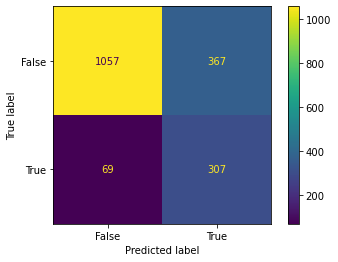

In [158]:
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_pred_cv, display_labels = [False, True])
plt.show()

## Extratrees Classifier

In [159]:
extra_trees_awal = ExtraTreesClassifier(random_state = 123)

In [160]:
extra_trees_awal.fit(X_rus_clean, y_rus)

ExtraTreesClassifier(random_state=123)

In [161]:
extra_trees_awal.score(X_rus_clean, y_rus)

1.0

In [162]:
y_extratress_pred = extra_trees_awal.predict(X_test_clean)

In [163]:
print(classification_report(y_test, y_extratress_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1424
           1       0.43      0.80      0.56       376

    accuracy                           0.74      1800
   macro avg       0.68      0.76      0.68      1800
weighted avg       0.83      0.74      0.76      1800



In [164]:
print(f"Training Data Score: {extra_trees_awal.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {extra_trees_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_awal.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.7241666666666666
Testing Data Score: 0.7355555555555555


## Tuning Parameter Extratrees Classifier

In [165]:
extra_trees = ExtraTreesClassifier(random_state = 123)

In [166]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [167]:
grid_search_et = GridSearchCV(extra_trees, param_grid, scoring='accuracy', cv=5)

In [168]:
grid_search_et.fit(X_rus_clean, y_rus)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=123),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [169]:
print(grid_search_et.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [170]:
extra_trees_best = ExtraTreesClassifier(n_estimators = grid_search_et.best_params_["n_estimators"], 
                                        max_depth = grid_search_et.best_params_["max_depth"], 
                                        min_samples_split= grid_search_et.best_params_["min_samples_split"], 
                                        min_samples_leaf=grid_search_et.best_params_["min_samples_leaf"])

In [171]:
extra_trees_best.fit(X_rus_clean, y_rus)

ExtraTreesClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [172]:
extratreescv_pred = extra_trees_best.predict(X_test_clean)

In [173]:
print(classification_report(y_test, extratreescv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1424
           1       0.43      0.80      0.56       376

    accuracy                           0.73      1800
   macro avg       0.68      0.76      0.68      1800
weighted avg       0.83      0.73      0.76      1800



In [174]:
print(f"Training Data Score: {extra_trees_best.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {extra_trees_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_best.score(X_test_clean, y_test)}")

Training Data Score: 0.8561452513966481
Validating Data Score: 0.7383333333333333
Testing Data Score: 0.7322222222222222


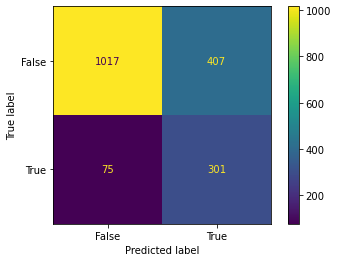

In [175]:
ConfusionMatrixDisplay.from_predictions(y_test, extratreescv_pred, display_labels = [False, True])
plt.show()

## XGboost Classifier

In [176]:
xgb_classifier = xgb.XGBClassifier(random_state = 123)

In [177]:
xgb_classifier.fit(X_rus_clean, y_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [178]:
xgb_classifier.score(X_rus_clean, y_rus)

0.994413407821229

In [179]:
xgb_pred = xgb_classifier.predict(X_test_clean)

In [180]:
print(classification_report(y_test, xgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1424
           1       0.44      0.80      0.57       376

    accuracy                           0.75      1800
   macro avg       0.69      0.77      0.70      1800
weighted avg       0.83      0.75      0.77      1800



In [181]:
print(f"Training Data Score: {xgb_classifier.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {xgb_classifier.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {xgb_classifier.score(X_test_clean, y_test)}")

Training Data Score: 0.994413407821229
Validating Data Score: 0.7425
Testing Data Score: 0.7494444444444445


## Tuning Parameter XGboost

In [182]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}


In [183]:
grid_search_xg = GridSearchCV(xgb_classifier, param_grid, scoring='accuracy', cv=5)

In [184]:
grid_search_xg.fit(X_rus_clean, y_rus)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [185]:
print(grid_search_xg.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}


In [186]:
xgb_best = xgb.XGBClassifier(n_estimators = grid_search_xg.best_params_["n_estimators"], 
                             max_depth = grid_search_xg.best_params_["max_depth"], 
                             learning_rate = grid_search_xg.best_params_["learning_rate"], 
                             subsample = grid_search_xg.best_params_["subsample"])

In [187]:
xgb_best.fit(X_rus_clean, y_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [188]:
xgboost_cv_pred = xgb_best.predict(X_test_clean)

In [189]:
print(classification_report(y_test, xgboost_cv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1424
           1       0.46      0.83      0.59       376

    accuracy                           0.76      1800
   macro avg       0.70      0.79      0.71      1800
weighted avg       0.84      0.76      0.78      1800



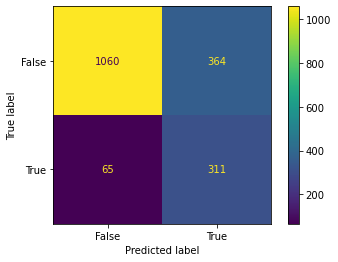

In [190]:
ConfusionMatrixDisplay.from_predictions(y_test, xgboost_cv_pred, display_labels = [False, True])
plt.show()

## Deep Learning

In [191]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [192]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:
history = model.fit(X_rus_clean, y_rus, epochs=500, batch_size=32, validation_data=(X_valid_clean, y_valid))

Epoch 1/500
90/90 [==============================] - 1s 5ms/step - loss: 0.6529 - accuracy: 0.6215 - val_loss: 0.6154 - val_accuracy: 0.6833
Epoch 2/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7004 - val_loss: 0.6123 - val_accuracy: 0.6858
Epoch 3/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7084 - val_loss: 0.6387 - val_accuracy: 0.6683
Epoch 4/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5764 - accuracy: 0.7105 - val_loss: 0.5853 - val_accuracy: 0.7025
Epoch 5/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.7126 - val_loss: 0.5790 - val_accuracy: 0.7042
Epoch 6/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.7249 - val_loss: 0.5441 - val_accuracy: 0.7250
Epoch 7/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7263 - val_loss: 0.5647 - val_accuracy: 0.7167
Epoch 8/500
9

Epoch 59/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8034 - val_loss: 0.5000 - val_accuracy: 0.7692
Epoch 60/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8066 - val_loss: 0.5152 - val_accuracy: 0.7500
Epoch 61/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8128 - val_loss: 0.5061 - val_accuracy: 0.7575
Epoch 62/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8027 - val_loss: 0.4858 - val_accuracy: 0.7725
Epoch 63/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8024 - val_loss: 0.4979 - val_accuracy: 0.7600
Epoch 64/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8066 - val_loss: 0.5198 - val_accuracy: 0.7467
Epoch 65/500
90/90 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8090 - val_loss: 0.5228 - val_accuracy: 0.7458
Epoch 

90/90 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.8153 - val_loss: 0.5862 - val_accuracy: 0.7117
Epoch 117/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8191 - val_loss: 0.5120 - val_accuracy: 0.7692
Epoch 118/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8195 - val_loss: 0.5368 - val_accuracy: 0.7550
Epoch 119/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8272 - val_loss: 0.5262 - val_accuracy: 0.7542
Epoch 120/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8251 - val_loss: 0.5140 - val_accuracy: 0.7575
Epoch 121/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8177 - val_loss: 0.5305 - val_accuracy: 0.7442
Epoch 122/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8247 - val_loss: 0.5377 - val_accuracy: 0.7417
Epoch 123/500

90/90 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8338 - val_loss: 0.5996 - val_accuracy: 0.7133
Epoch 174/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8254 - val_loss: 0.5794 - val_accuracy: 0.7258
Epoch 175/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8303 - val_loss: 0.5410 - val_accuracy: 0.7442
Epoch 176/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8296 - val_loss: 0.5721 - val_accuracy: 0.7292
Epoch 177/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8387 - val_loss: 0.5497 - val_accuracy: 0.7333
Epoch 178/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8328 - val_loss: 0.5855 - val_accuracy: 0.7150
Epoch 179/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8314 - val_loss: 0.5592 - val_accuracy: 0.7292
Epoch 180/500

90/90 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8439 - val_loss: 0.5890 - val_accuracy: 0.7267
Epoch 231/500
90/90 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.8474 - val_loss: 0.5830 - val_accuracy: 0.7275
Epoch 232/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8436 - val_loss: 0.5873 - val_accuracy: 0.7233
Epoch 233/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8401 - val_loss: 0.5738 - val_accuracy: 0.7350
Epoch 234/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8397 - val_loss: 0.5850 - val_accuracy: 0.7333
Epoch 235/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8383 - val_loss: 0.5791 - val_accuracy: 0.7433
Epoch 236/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8425 - val_loss: 0.5916 - val_accuracy: 0.7350
Epoch 237/500

90/90 [==============================] - 0s 3ms/step - loss: 0.3265 - accuracy: 0.8499 - val_loss: 0.5932 - val_accuracy: 0.7350
Epoch 288/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8471 - val_loss: 0.6002 - val_accuracy: 0.7300
Epoch 289/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8495 - val_loss: 0.5958 - val_accuracy: 0.7358
Epoch 290/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8460 - val_loss: 0.6151 - val_accuracy: 0.7225
Epoch 291/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8502 - val_loss: 0.5857 - val_accuracy: 0.7450
Epoch 292/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8404 - val_loss: 0.6297 - val_accuracy: 0.7183
Epoch 293/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8464 - val_loss: 0.5944 - val_accuracy: 0.7342
Epoch 294/500

90/90 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8603 - val_loss: 0.6237 - val_accuracy: 0.7392
Epoch 345/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.8513 - val_loss: 0.6083 - val_accuracy: 0.7392
Epoch 346/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8617 - val_loss: 0.6233 - val_accuracy: 0.7392
Epoch 347/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8579 - val_loss: 0.5995 - val_accuracy: 0.7392
Epoch 348/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8593 - val_loss: 0.6261 - val_accuracy: 0.7292
Epoch 349/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8554 - val_loss: 0.5974 - val_accuracy: 0.7467
Epoch 350/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.8492 - val_loss: 0.5613 - val_accuracy: 0.7600
Epoch 351/500

90/90 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8621 - val_loss: 0.6333 - val_accuracy: 0.7333
Epoch 402/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8537 - val_loss: 0.6283 - val_accuracy: 0.7258
Epoch 403/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8614 - val_loss: 0.6241 - val_accuracy: 0.7350
Epoch 404/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8586 - val_loss: 0.6295 - val_accuracy: 0.7392
Epoch 405/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.8499 - val_loss: 0.6425 - val_accuracy: 0.7292
Epoch 406/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8663 - val_loss: 0.6615 - val_accuracy: 0.7183
Epoch 407/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8561 - val_loss: 0.6315 - val_accuracy: 0.7342
Epoch 408/500

90/90 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8582 - val_loss: 0.6294 - val_accuracy: 0.7400
Epoch 459/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8666 - val_loss: 0.6500 - val_accuracy: 0.7275
Epoch 460/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.8596 - val_loss: 0.6271 - val_accuracy: 0.7392
Epoch 461/500
90/90 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8575 - val_loss: 0.6743 - val_accuracy: 0.7292
Epoch 462/500
90/90 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.8579 - val_loss: 0.6927 - val_accuracy: 0.7183
Epoch 463/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8572 - val_loss: 0.6862 - val_accuracy: 0.7250
Epoch 464/500
90/90 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8628 - val_loss: 0.6591 - val_accuracy: 0.7333
Epoch 465/500

In [194]:
deep_pred = np.argmax(model.predict(X_valid_clean), axis=-1)
accuracy = accuracy_score(y_valid, deep_pred)
print("Accuracy:", accuracy)

38/38 [==============================] - 0s 1ms/step
Accuracy: 0.8091666666666667


In [195]:
deep_pred = np.argmax(model.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 2ms/step
Accuracy: 0.7911111111111111


In [196]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



## Tuning Parameter Deep Learning

In [197]:
def create_model(units=64, layers=2, dropout=0.2):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(13,)))
    model.add(Dropout(dropout))
    for i in range(layers-1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [198]:
model = KerasClassifier(build_fn=create_model)

In [199]:
param_grid = {
    'units': [32, 64, 128],
    'layers': [2, 3, 4],
    'dropout': [0.2, 0.3, 0.4]
}

In [200]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [201]:
grid_result = grid.fit(X_rus_clean, y_rus)

18/18 [==============================] - 0s 2ms/step - loss: 0.9135 - accuracy: 0.0803


18/18 [==============================] - 0s 1ms/step - loss: 0.8283 - accuracy: 0.2426


90/90 [==============================] - 1s 3ms/step - loss: 0.6271 - accuracy: 0.6446


In [202]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.647000 using {'dropout': 0.3, 'layers': 4, 'units': 128}


In [203]:
deep_pred = np.argmax(grid_result.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 2ms/step
Accuracy: 0.7911111111111111


In [204]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



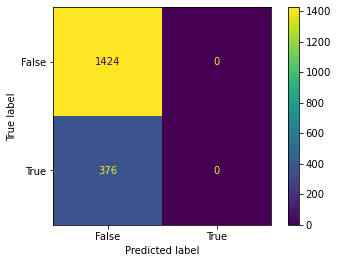

In [205]:
ConfusionMatrixDisplay.from_predictions(y_test, deep_pred, display_labels = [False, True])
plt.show()

## LightGBM

In [206]:
# define the LightGBM classifier
lgb_awal = LGBMClassifier(random_state = 123)

In [207]:
lgb_awal.fit(X_rus_clean, y_rus)

LGBMClassifier(random_state=123)

In [208]:
# train the classifier
lgb_awal.score(X_rus_clean, y_rus)

0.9528631284916201

In [209]:
# make predictions on the testing set
lgb_pred = lgb_awal.predict(X_test_clean)

In [210]:
print(f"Training Data Score: {lgb_awal.score(X_rus_clean, y_rus)}")
print(f"Validating Data Score: {lgb_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lgb_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.9528631284916201
Validating Data Score: 0.7608333333333334
Testing Data Score: 0.7555555555555555


In [211]:
print(classification_report(y_test, lgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1424
           1       0.45      0.81      0.58       376

    accuracy                           0.76      1800
   macro avg       0.69      0.77      0.70      1800
weighted avg       0.83      0.76      0.78      1800



## Tuning Parameter LightGBM

In [212]:
# define the LightGBM classifier
lgb = LGBMClassifier()

In [213]:
# define the hyperparameters to tune
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [214]:
# create the grid search object
grid_search_lgb = GridSearchCV(lgb, param_grid=param_grid, cv=5)

In [215]:
# train the grid search object
grid_search_lgb.fit(X_rus_clean, y_rus)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'num_leaves': [10, 20, 30]})

In [216]:
best_params = grid_search_lgb.best_params_

In [217]:
lgbm_best = LGBMClassifier(**best_params)

In [218]:
lgbm_best.fit(X_rus_clean, y_rus)

LGBMClassifier(max_depth=3, num_leaves=10)

In [219]:
lgb_best_pred = lgbm_best.predict(X_test_clean)

In [220]:
print(classification_report(y_test, lgb_best_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1424
           1       0.46      0.83      0.60       376

    accuracy                           0.76      1800
   macro avg       0.70      0.79      0.71      1800
weighted avg       0.84      0.76      0.78      1800



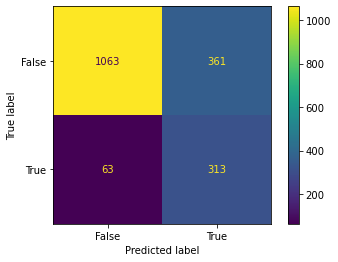

In [221]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_best_pred, display_labels = [False, True])
plt.show()

In [222]:
# evaluate the classifier using accuracy score and ROC AUC score
acc = accuracy_score(y_test, lgb_best_pred)
roc_auc = roc_auc_score(y_test, lgb_best_pred)
print('Accuracy:', acc)
print('ROC AUC score:', roc_auc)

Accuracy: 0.7644444444444445
ROC AUC score: 0.7894677862777911


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import pandas as pd

# buat dictionary dengan nama-nama model dan objek modelnya
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

# buat dataframe kosong untuk menampung nilai metrik dari setiap model
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Macro Avg', 'Weighted Avg'])

# loop untuk menghitung dan menyimpan metrik untuk setiap model
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test)
    # hitung metrik
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_avg = report['macro avg']
    weighted_avg = report['weighted avg']
    # tambahkan hasil ke dataframe
    results_df = results_df.append({'Model': name, 'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Macro Avg': macro_avg, 'Weighted Avg': weighted_avg}, ignore_index=True)

# tampilkan tabel hasil komparasi
print(results_df)


In [224]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {'Logistic Regression': logreg_awal, 
          'Logistic Regression CV': lr_grid_cv,
          'Decision Tree': decTree, 
          'Decision Tree CV': best_decTree,
          'Support Vector Classifier':svc_ori,
          'Support Vector Classifier CV':svc_grid_cv,
          'Random Forest':random_forest,
          'Random Forest CV':random_forestcls_cv,
          'Ridge':ridge,
          'Ridge CV':ridge_cv,
          'KNN':knn_awal,
          'KNN CV':kn_grid,
          'Bagging':bagging_cls,
          'Bagging CV':bagging_cv,
          'gradient Boosting':grad_boost,
          'gradient Boosting CV':gradboost_cv,
          'Adaboost':abc_ori,
          'Adaboost SVC':adaboost_svc,
          'Adaboost CV':adaboost_best,
          'Extratrees':extra_trees_awal,
          'Extratrees CV':extra_trees_best,
          'XGboost':xgb_classifier,
          'XGboost CV':xgb_best,
          'LightGBM':lgb_awal,
          'LightGBM CV':lgbm_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
print(df_results)


                              precision    recall  f1_score  accuracy  \
Logistic Regression            0.805668  0.680000  0.709595  0.680000   
Logistic Regression CV         0.803996  0.681667  0.710995  0.681667   
Decision Tree                  0.801069  0.692778  0.720435  0.692778   
Decision Tree CV               0.831021  0.771667  0.788582  0.771667   
Support Vector Classifier      0.831613  0.748889  0.770030  0.748889   
Support Vector Classifier CV   0.828613  0.731111  0.754839  0.731111   
Random Forest                  0.836399  0.755556  0.776019  0.755556   
Random Forest CV               0.836583  0.756111  0.776499  0.756111   
Ridge                          0.805758  0.682778  0.712030  0.682778   
Ridge CV                       0.805758  0.682778  0.712030  0.682778   
KNN                            0.804789  0.712778  0.737557  0.712778   
KNN CV                         0.812330  0.717778  0.742376  0.717778   
Bagging                        0.822262  0.754444  

In [225]:
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
Logistic Regression,0.805668,0.680000,0.709595,0.680000,0.646610,0.718481,0.634678,0.805668,0.680000,0.709595
Logistic Regression CV,0.803996,0.681667,0.710995,0.681667,0.645723,0.716598,0.635103,0.803996,0.681667,0.710995
Decision Tree,0.801069,0.692778,0.720435,0.692778,0.646452,0.714813,0.641457,0.801069,0.692778,0.720435
Decision Tree CV,0.831021,0.771667,0.788582,0.771667,0.698673,0.769566,0.713148,0.831021,0.771667,0.788582
Support Vector Classifier,0.831613,0.748889,0.770030,0.748889,0.689023,0.768871,0.697148,0.831613,0.748889,0.770030
Support Vector Classifier CV,0.828613,0.731111,0.754839,0.731111,0.680093,0.761550,0.682552,0.828613,0.731111,0.754839
Random Forest,0.836399,0.755556,0.776019,0.755556,0.695193,0.776999,0.704532,0.836399,0.755556,0.776019
Random Forest CV,0.836583,0.756111,0.776499,0.756111,0.695556,0.777350,0.705039,0.836583,0.756111,0.776499
Ridge,0.805758,0.682778,0.712030,0.682778,0.647425,0.719258,0.636707,0.805758,0.682778,0.712030
Ridge CV,0.805758,0.682778,0.712030,0.682778,0.647425,0.719258,0.636707,0.805758,0.682778,0.712030


# Save Model

## Logistic Regression

In [226]:
logreg = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/logreg.pkl'
with open(logreg, 'wb') as file:
    pickle.dump(logreg_awal, file)
    
logreg_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/logreg_cv.pkl'
with open(logreg_cv, 'wb') as file:
    pickle.dump(lr_grid_cv, file)

## Support Vector Classifier

In [227]:
svc = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/svc.pkl'
with open(svc, 'wb') as file:
    pickle.dump(svc_ori, file)
    
svc_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/svc_cv.pkl'
with open(svc_cv, 'wb') as file:
    pickle.dump(svc_grid_cv, file)

## Decisiontree

In [228]:
dectree = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/dectree.pkl'
with open(dectree, 'wb') as file:
    pickle.dump(decTree, file)
    
dectree_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/dectree_cv.pkl'
with open(dectree_cv, 'wb') as file:
    pickle.dump(best_decTree, file)

## Randomforest

In [229]:
randomforest = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/randomforest.pkl'
with open(randomforest, 'wb') as file:
    pickle.dump(random_forest, file)
    
randomforest_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/randomforest_cv.pkl'
with open(randomforest_cv, 'wb') as file:
    pickle.dump(random_forestcls_cv, file)

## Ridge Classifier

In [230]:
ridge = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/ridge.pkl'
with open(ridge, 'wb') as file:
    pickle.dump(ridge, file)
    
ridge_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/ridge_cv.pkl'
with open(ridge_cv, 'wb') as file:
    pickle.dump(ridge_cv, file)

## KNN 

In [231]:
knn = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/knn.pkl'
with open(knn, 'wb') as file:
    pickle.dump(knn_awal , file)
    
knn_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/knn_cv.pkl'
with open(knn_cv, 'wb') as file:
    pickle.dump(kn_grid, file)

## Bagging Classifier

In [232]:
bagging = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/bagging.pkl'
with open(bagging, 'wb') as file:
    pickle.dump(bagging_cls, file)
    
bagging_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/bagging_cv.pkl'
with open(bagging_cv, 'wb') as file:
    pickle.dump(bagging_cv, file)

## Gradient Boosting

In [233]:
grad_boost = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/grad_boost.pkl'
with open(grad_boost, 'wb') as file:
    pickle.dump(grad_boost, file)
    
grad_boost_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/grad_boost_cv.pkl'
with open(grad_boost_cv, 'wb') as file:
    pickle.dump(gradboost_cv, file)

## Adaboost

In [234]:
adaboost_svc = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/adaboost_svc.pkl'
with open(adaboost_svc, 'wb') as file:
    pickle.dump(adaboost_svc, file)
    
adaboost_ori = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/adaboost_ori.pkl'
with open(adaboost_ori, 'wb') as file:
    pickle.dump(abc_ori, file)
    
adaboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/adaboost_cv.pkl'
with open(adaboost_cv, 'wb') as file:
    pickle.dump(adaboost_best, file)

## Extratrees

In [235]:
extra_trees = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/extra_trees.pkl'
with open(extra_trees, 'wb') as file:
    pickle.dump(extra_trees_awal, file)
    
extra_tree_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/extra_tree_cv.pkl'
with open(extra_tree_cv, 'wb') as file:
    pickle.dump(extra_trees_best, file)

## XgBoost

In [236]:
xgboost = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/xgboost.pkl'
with open(xgboost, 'wb') as file:
    pickle.dump(xgb_classifier, file)
    
xgboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/xgboost_cv.pkl'
with open(xgboost_cv, 'wb') as file:
    pickle.dump(xgb_best, file)

## Deep Learning

In [237]:
deep_learning = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/deep_learning.pkl'
with open(deep_learning, 'wb') as file:
    pickle.dump(model, file)
    
    
deep_learning_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/deep_learning_cv.pkl'
with open(deep_learning_cv, 'wb') as file:
    pickle.dump(grid_result, file)

INFO:tensorflow:Assets written to: C:\Users\HALAL\AppData\Local\Temp\tmp1rz6f0xp\assets


## LightGBM

In [238]:
lgbm = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/lgbm.pkl'
with open(lgbm, 'wb') as file:
    pickle.dump(lgb_awal, file)
    
lgbm_cv = 'C:/Users/HALAL/Final Project ML Process/model/2 - Model Random Under Sampling/lgbm_cv.pkl'
with open(lgbm_cv, 'wb') as file:
    pickle.dump(lgbm_best, file)

## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"''"